# Preprocessing

## Import libraries and connect drive

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Get the correct labels

!!! Your basepath might be different from mine so make sure to change it to reflect the datafiles in the project

- Read subfolders from big folder "Correct"
- Read images from each subfolders
- The total amount of "correct" images is 10572
- Create an array with 10572 "OK" labels as correct

In [ ]:
#Linh's path
# basePath = '/content/drive/Shareddrives/Neural net/Neural Net Team Project/Data Files'
#Phyllis' path
#basePath = '/content/drive/MyDrive/Neural Net Team Project/Data Files'
#ana's path
#basePath = '/content/drive/MyDrive/Neural Net Team Project/Data Files'
#Mohammed's path
basePath = '/content/drive/MyDrive/Data Files'

In [ ]:
def read_sub_folder(big_folder):
  sub_folder = []
  for file in glob.glob(f"{basePath}/{big_folder}/*"):
    sub_folder.append(file)
  return sub_folder

def read_image(sub_list):
  image = []
  for sub_folder_name in sub_list:
    for picture_name in glob.glob(f"{sub_folder_name}/*"):
      image.append(picture_name)
  return image


In [ ]:
sub_list = read_sub_folder('Correct')
correct_files = read_image(sub_list)

## Get the incorrect labels

- Read images from folder "Incorrect"
- There are 3 labels: "Mask mouth chin" as "MMC", "Mask chin" as "MC", "Mask nose mouth" as "MNM"


In [ ]:
incorrect_files = read_sub_folder('Incorrect')

In [ ]:
sub_string1 = 'Mask_Mouth_Chin'
sub_string2 = 'Mask_Chin'
sub_string3 = 'Mask_Nose_Mouth'

## Load images

- Take a sample of 1000 images from each "correct" and "incorrect" images (because all images will take too long - this one will take 5 min to load)
- Resize the image in 200x200
- Append the pictures into 2 arrays with shape (1000,200,200,3)
- Take top 1000 labels from each label

Output:
- 2 picture arrays shape (1000,200,200,3): correct_images, incorrect_images
- 2 label arrays shape (1000,): correct_labels, incorrect_labels

In [ ]:
incorrect_1000 = incorrect_files[:100]
correct_1000 = correct_files[:100]

In [ ]:
#image_size = (200,200)
#Try changing image size
image_size = (180,180)

Group incorrect images into their categories.

In [ ]:
  mmc_list = []
mc_list = []
mnm_list = []
for file in incorrect_1000:
    if sub_string1 in file:
        im=Image.open(file)
        im=im.resize(size=image_size)
        mmc_list.append(np.divide(np.array(im),255))
    elif sub_string2 in file:
        im=Image.open(file)
        im=im.resize(size=image_size)
        mc_list.append(np.divide(np.array(im),255))
    elif sub_string3 in file:
        im=Image.open(file)
        im=im.resize(size=image_size)
        mnm_list.append(np.divide(np.array(im),255))

Load correct images.

In [ ]:
correct_list = []
for file in correct_1000:
    im=Image.open(file)
    im=im.resize(size=image_size)
    correct_list.append(np.divide(np.array(im),255))

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
def augmentation(image_list):

    datagen.fit(image_list)

    # Now we create the iterator... we can keep pulling new randomly transformed pictures out of this forever. 
    image_batches = datagen.flow(np.stack(image_list,axis=0), batch_size=30)

    n = 5
    plt.figure(figsize= (20,10))

    q = 0
    for i,batch in enumerate(image_batches):
        for j, image in enumerate(batch): 
            if j == 1: 
                # Only plot the first 6 photos.
                if i <= 5:
                    ax = plt.subplot(1, 6, i+1)
                    plt.imshow(tf.keras.utils.array_to_img(image))
                    ax.get_xaxis().set_visible(False)
                    ax.get_yaxis().set_visible(False)
            
            # The iterator outputs image data with pixel values between 0-1; we are using values between 0-255 elsewhere.
            # We need to make the pixel values align.
            image_list.append(np.multiply(image,255))
        

        # Telling the script to stop asking for new images after several batches.
        # Change for more or less outputs
        if q > 50:
            break

        q += 1    

    return image_list

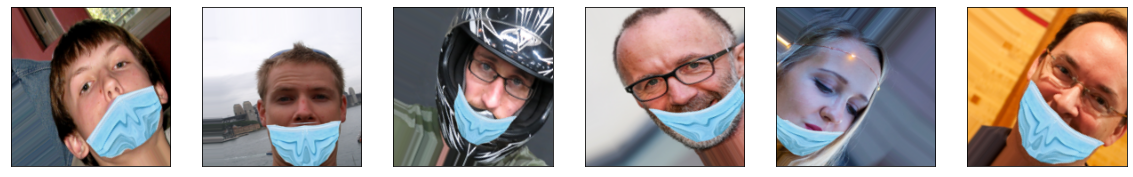

In [ ]:
mmc_list = augmentation(mmc_list)

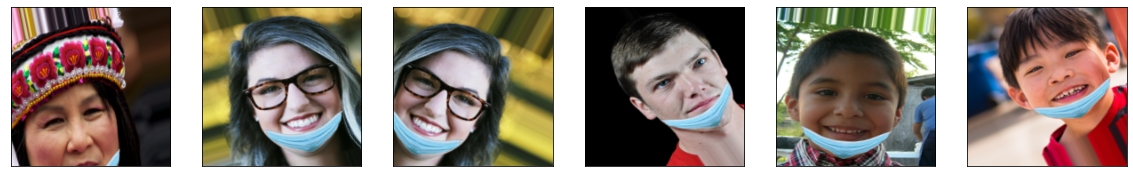

In [ ]:
mc_list = augmentation(mc_list)

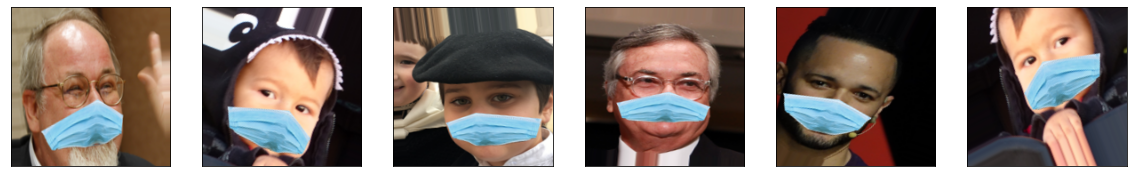

In [ ]:
mnm_list = augmentation(mnm_list)

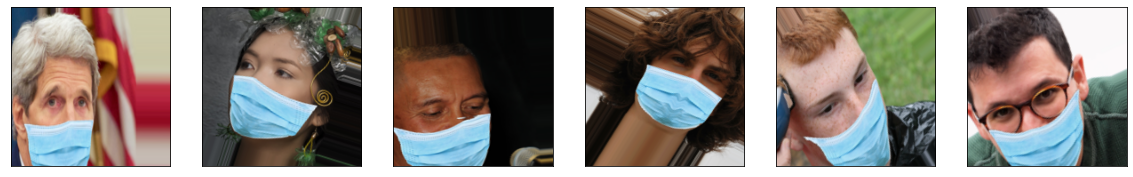

In [ ]:
correct_list = augmentation(correct_list)

In [ ]:
mmc_label = []
for i in range(0,len(mmc_list)):
    mmc_label.append('MMC')

In [ ]:
mc_label = []
for i in range(0,len(mc_list)):
    mc_label.append('MC')

In [ ]:
mnm_label = []
for i in range(0,len(mnm_list)):
    mnm_label.append('MNM')

In [ ]:
correct_label = []
for i in range(0,len(correct_list)):
    correct_label.append('OK')

Note: All images and labels are in lists. There are 4 categories: MMC, MC, MNM, and OK. Data needs to be shuffled before next step.

# Starting to implement the model

### First I made the image list into numpy arrays 

### Then shuffled the images

In [ ]:
from sklearn.utils import shuffle
correct_images = shuffle(correct_list)
mmc_images = shuffle(mmc_list)
mc_images = shuffle(mc_list)
mnm_images = shuffle(mnm_list)

### Trying to determine that the code worked as intended 

Creating features

In [ ]:
combined_list=[]

In [ ]:
for i in correct_list:
  combined_list.append(i)
for i in mmc_list:
  combined_list.append(i)
for i in mc_list:
  combined_list.append(i)
for i in mnm_list :
  combined_list.append(i)  

In [ ]:
combined_list=np.array(combined_list)

In [ ]:
combined_list.shape

(3965, 180, 180, 3)

Creating Labels

In [ ]:
combined_labels=[]

In [ ]:
for i in correct_label:
  combined_labels.append(i)
for i in mmc_label:
  combined_labels.append(i)
for i in mc_label:
  combined_labels.append(i)
for i in mnm_label :
  combined_labels.append(i) 

In [ ]:
combined_labels = pd.get_dummies(combined_labels)

In [ ]:
column_names=[]
for col in combined_labels:
  column_names.append(col)

In [ ]:
combined_labels=np.array(combined_labels)

In [ ]:
combined_labels.shape

(3965, 4)

Shuffling the features and labels before sampling

In [ ]:
from sklearn.utils import shuffle
combined_labels=shuffle(combined_labels)
combined_list=shuffle(combined_list)

Sampling Features and labels

In [ ]:
#Sampling for training
combined_labels_samples=combined_labels[:300]
combined_list_sample=combined_list[:300]
#Sampling for test
combined_labels_test=combined_labels[-300:]
combined_list_test=combined_list[-300:]


### Defining Model from Scratch 

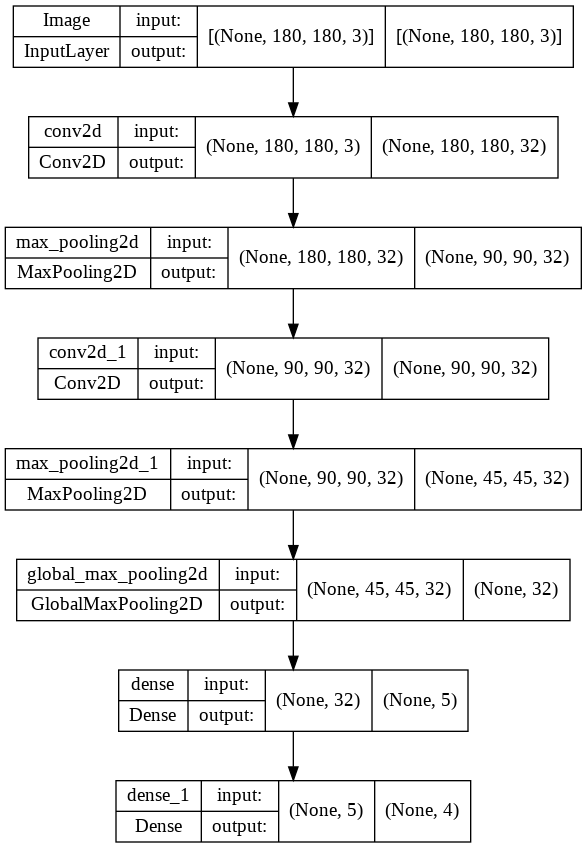

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  #Image Branch
  input_image = layers.Input(shape=(combined_list.shape[1],combined_list.shape[2],combined_list.shape[3]), name="Image")
  x = layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu")(input_image)
  x = layers.MaxPool2D(2,strides=2)(x)
  x = layers.Conv2D(filters=32,kernel_size=3,padding="same",activation="relu")(x)
  x = layers.MaxPool2D(2,strides=2)(x)
  images_output = layers.GlobalMaxPooling2D()(x) 

  x = layers.Dense(5,activation="relu")(images_output)
  final_output = layers.Dense(4, activation="softmax")(x) 

  model = keras.Model(inputs=input_image, outputs=final_output)
  model.compile(loss=['categorical_crossentropy'], metrics=['accuracy'])
  
  return model

#model.summary()
keras.utils.plot_model(build_model(), show_shapes=True)

### Potentially fitting the model 

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

#Defining the model 
model = build_model()

model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_1 = model.fit(images_all,labels_all,epochs=10,batch_size=10,validation_split=0.2)
                    

NameError: ignored

Pretrained Model

In [ ]:
#Loading the pretrained model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model

In [ ]:
###Pre trained model
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False, # Throw away the densely connected layer at the end.
    input_shape=(180, 180, 3))
conv_base.trainable = False 
conv_base.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers

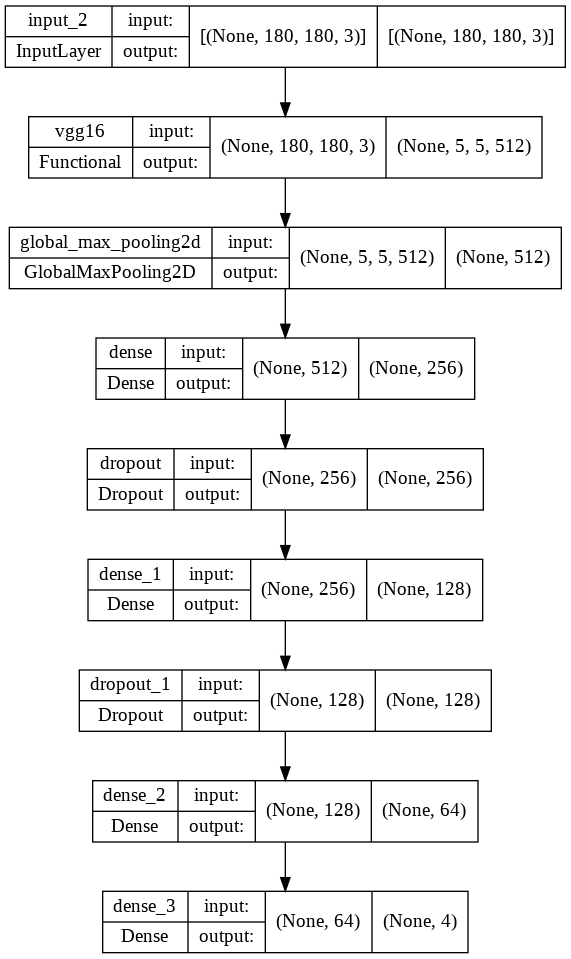

In [ ]:
def build_model_preTrain():

  inputs = keras.Input(shape=(180, 180, 3))

  x = conv_base(inputs)
  x = layers.GlobalMaxPooling2D()(x)#Used to reduce the dimensionality of the input
  x = layers.Dense(256,activation="relu")(x)
  x = layers.Dropout(0.5)(x)#Dropout layers to prevent overfitting
  x = layers.Dense(128,activation="relu")(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(64,activation="relu")(x)
  outputs = layers.Dense(4,activation="softmax")(x)#Softmax label for calcualting probabilties for different classes
  model_preTrain = keras.Model(inputs, outputs)
  model_preTrain.compile(loss="categorical_crossentropy",#Categrocial Crossentropy as a loss function since this is a multi-label classiification problem
                optimizer="adam",
                metrics=["accuracy"]
                )
  return model_preTrain
keras.utils.plot_model(build_model_preTrain(), show_shapes=True)

In [ ]:
#Compiling and fitting model
preTrain_model = build_model_preTrain()

preTrain_model.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

history_1 = preTrain_model.fit(combined_list_sample,combined_labels_samples,epochs=10,batch_size=10,validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 97s 4s/step - loss: 1.7089 - accuracy: 0.2917 - val_loss: 1.2654 - val_accuracy: 0.4833
Epoch 2/10
24/24 [==============================] - 95s 4s/step - loss: 1.4095 - accuracy: 0.3042 - val_loss: 1.1595 - val_accuracy: 0.4833
Epoch 3/10
24/24 [==============================] - 95s 4s/step - loss: 1.3930 - accuracy: 0.3000 - val_loss: 1.2665 - val_accuracy: 0.4833
Epoch 4/10
24/24 [==============================] - 95s 4s/step - loss: 1.3870 - accuracy: 0.3208 - val_loss: 1.1763 - val_accuracy: 0.4833
Epoch 5/10
24/24 [==============================] - 95s 4s/step - loss: 1.3857 - accuracy: 0.3250 - val_loss: 1.2159 - val_accuracy: 0.4833
Epoch 6/10
24/24 [==============================] - 95s 4s/step - loss: 1.3674 - accuracy: 0.3083 - val_loss: 1.2398 - val_accuracy: 0.4833
Epoch 7/10
24/24 [==============================] - 95s 4s/step - loss: 1.3334 - accuracy: 0.3500 - val_loss: 1.2077 - val_accuracy: 0.4500
Epoch 8/10
24/24 [==

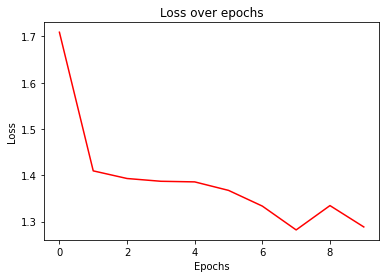

In [ ]:
#Plotting loss
plt.plot(history_1.history['loss'],c='r')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over epochs")
plt.show()

In [ ]:
test_loss, test_acc=preTrain_model.evaluate(combined_list_test,combined_labels_test)
print(f"Test accuracy: {test_acc}")

10/10 [==============================] - 95s 9s/step - loss: 1.3142 - accuracy: 0.3433
Test accuracy: 0.34333333373069763


If we have time we can use the function below to for our own images

In [ ]:
#Making predictions
predictions=preTrain_model.predict(combined_list_sample)

In [ ]:
def predictions_to_text(predictions):
  predictions = predictions.tolist()
  text_predictions=[]

  for i in range(len(predictions)):
    max_value=max(predictions[i])
    position=predictions[i].index(max_value)
    text=column_names[position]
    text_predictions.append(text)
  text_predictions=np.array(text_predictions)
  return text_predictions

In [ ]:
predictions_to_text(predictions)

array(['OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'MMC', 'MMC', 'OK', 'OK',
       'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK',
       'OK', 'OK', 'MMC', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK',
       'OK', 'OK', 'OK', 'OK', 'MMC', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK',
       'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK',
       'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK',
       'OK', 'MMC', 'OK', 'MMC', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK',
       'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'MMC', 'OK',
       'OK', 'MMC', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK',
       'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK',
       'OK', 'OK', 'OK', 'OK', 'OK', 'MMC', 'OK', 'OK', 'OK', 'OK', 'OK',
       'OK', 'OK', 'OK', 'OK', 'MMC', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK',
       'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK', 'OK',
       'OK', 'OK', 'OK', 'OK', 'OK', 'OK'

Validating on our photos

In [ ]:
for filename in os.listdir(basePath):
  print(filename)

Photo on 3-16-22 at 7.15 PM.jpg
DCA87025-0887-45ED-B52F-3423C222BD7B.heic
Photo on 3-16-22 at 7.12 PM.jpg
Screen Shot 2022-03-16 at 7.12.47 PM.png
IMG_8550.PNG
IMG_8547 2.PNG
IMG_8549.PNG


In [ ]:
Mohammed_image=cv2.imread('/content/drive/MyDrive/Team Pics- Validation/Validation pics/Photo on 3-16-22 at 7.15 PM.jpg')
Ana_image=cv2.imread('/content/drive/MyDrive/Team Pics- Validation/Validation pics/Photo on 3-16-22 at 7.12 PM.jpg')
arpit_image=cv2.imread('/content/drive/MyDrive/Team Pics- Validation/Validation pics/Screen Shot 2022-03-16 at 7.12.47 PM.png')
Ana_friend=cv2.imread('/content/drive/MyDrive/Team Pics- Validation/Validation pics/IMG_8549.PNG')

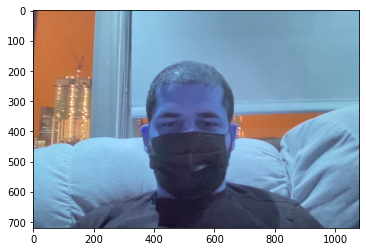

In [ ]:
plt.imshow(Mohammed_image)

In [ ]:
Mohammed_image=Mohammed_image.copy()
Mohammed_image=np.resize(Mohammed_image,(1,180,180,3))
validation_predictions=preTrain_model.predict(Mohammed_image)
predictions_to_text(validation_predictions)

array(['OK'], dtype='<U2')

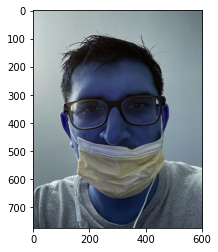

In [ ]:
plt.imshow(arpit_image)

In [ ]:
arpit_image=arpit_image.copy()
arpit_image=np.resize(arpit_image,(1,180,180,3))
validation_predictions=preTrain_model.predict(arpit_image)
predictions_to_text(validation_predictions)

array(['OK'], dtype='<U2')

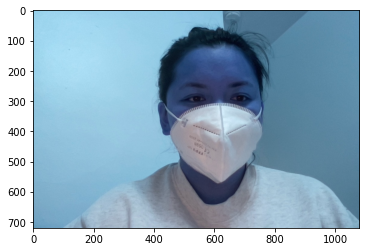

In [ ]:
plt.imshow(Ana_image)

In [ ]:
Ana_image=Ana_image.copy()
Ana_image=np.resize(Ana_image,(1,180,180,3))
validation_predictions=preTrain_model.predict(Ana_image)
predictions_to_text(validation_predictions)

array(['OK'], dtype='<U2')

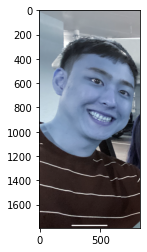

In [ ]:
plt.imshow(Ana_friend)

In [ ]:
Ana_friend=Ana_friend.copy()
Ana_friend=np.resize(Ana_friend,(1,180,180,3))
validation_predictions=preTrain_model.predict(Ana_friend)
predictions_to_text(validation_predictions)

array(['OK'], dtype='<U2')